In [15]:
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from matplotlib import pyplot

from statsmodels.tsa.arima.model import ARIMA

In [16]:
def split_dataset(data):
  train = data[1:-328]
  test = data[-328:-6]

  train = array(split(train, len(train)/7))
  test = array(split(test, len(test)/7))

  return train, test

In [17]:
def to_series(data):
  series = [week[:,0] for week in data]
  
  series = array(series).flatten()
  return series 

In [18]:
def evaluate_model(train, test):
  history = [x for x in train]

  predictions = list()
  for i in range(len(test)):
    yhat_sequence = arima_forecast(history)
    predictions.append(yhat_sequence)
    history.append(test[i, :])
    predictions = array(predictions)
  return predictions
     

In [29]:

def arima_forecast(history):
  series = to_series(history)
  model = ARIMA(series, order = (7, 0, 0))
  model_fit = model.fit
  yhat = model_fit.predict(len(series), len(series)+6)

  return yhat

In [34]:
dataset = read_csv('household_power_consumption_days.csv', header = 0, infer_datetime_format = True, parse_dates = ['datetime'], index_col = ['datetime'])
# Split into train and test
train, test = split_dataset(dataset.values)
predictions = evaluate_model(train, test)

<function matplotlib.pyplot.show(close=None, block=None)>

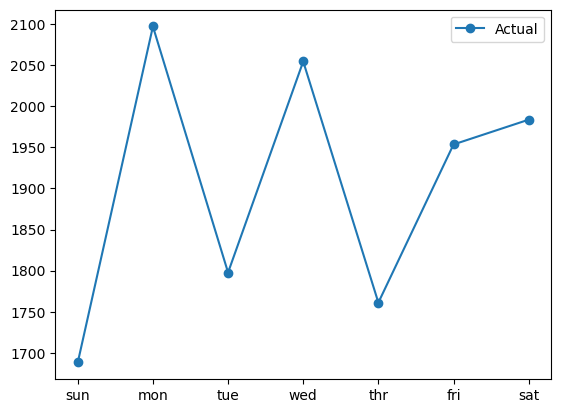

In [36]:
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
pyplot.plot(days, test[6], marker='o')
pyplot.plot(days, predictions[6], marker='o')
pyplot.legend(["Actual", "Predicted"])
pyplot.show